## First Online Learning in Python

In this tutorial, we will do the first online learning in Python. We will use demo data that we split manually into the batches and we "assume" they are coming in a real time.

You can find the data for this tutorial [**here**](https://drive.google.com/file/d/1WeylXMG4JZ_wxyqjz6MgjwpMI4ZVkdFz/view?usp=sharing). It's a NBA dataset we have used in exercises for probability and statistics. It consists of statistics and result of each NBA game in 3 regular seasons 2013-2015.

We will use statistics from regular season games to predict if teams won or lost in playoffs. You can find a playoff dataset [**here**](https://drive.google.com/file/d/15cx7LsopbCZ9WQ5CbGZHK_Dp-IPDrRqF/view?usp=sharing).

In [1]:
# import required packages
import pandas as pd
import numpy as np

In [2]:
# Load the data and keep only the columns we will need in this tutorial
data_path = ""
df = pd.read_csv(data_path + "nba_games_2013_2015.csv",sep=";")
# we want to keep only these statistics
cols_to_keep = ['GAME_DATE','WL', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
df = df[cols_to_keep]
# convert to datetime
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
df = df.sort_values('GAME_DATE')

In [3]:
df.head()

,GAME_DATE,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF
7379,2013-10-29,W,97,34,71,0.479,7,17,0.412,22,32,0.688,10,34,44,17,4,18,20,13
7374,2013-10-29,L,103,41,83,0.494,8,21,0.381,13,23,0.565,10,30,40,27,11,4,16,21
7375,2013-10-29,L,87,36,93,0.387,9,19,0.474,6,10,0.600,13,26,39,17,10,6,17,26
7378,2013-10-29,L,95,35,83,0.422,7,26,0.269,18,23,0.783,11,30,41,23,11,4,18,27
7377,2013-10-29,W,116,42,93,0.452,14,29,0.483,18,28,0.643,18,34,52,23,8,6,19,23


For initial training , we will use only games from 2013.

In [4]:
first_train = df[df.GAME_DATE.dt.year == 2013]
first_train = first_train.drop("GAME_DATE", axis = 1)

Now , we need to prepare our target variable, `WL`. We will convert it into 0 and 1 using LabelEncoder()

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
first_train.WL = le.fit_transform(first_train.WL.values)

In [7]:
# Let's see how our dataset looks like now:
first_train.head()

,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF
7379,1,97,34,71,0.479,7,17,0.412,22,32,0.688,10,34,44,17,4,18,20,13
7374,0,103,41,83,0.494,8,21,0.381,13,23,0.565,10,30,40,27,11,4,16,21
7375,0,87,36,93,0.387,9,19,0.474,6,10,0.600,13,26,39,17,10,6,17,26
7378,0,95,35,83,0.422,7,26,0.269,18,23,0.783,11,30,41,23,11,4,18,27
7377,1,116,42,93,0.452,14,29,0.483,18,28,0.643,18,34,52,23,8,6,19,23


In [8]:
# Extract y and X from the dataset
y_first = first_train.WL
X_first = first_train.drop("WL", axis = 1)

### Prepare Test Set

In [10]:
# Load the data and keep only the columns we will need in this tutorial
data_path = ""
play_offs = pd.read_csv(data_path + "nba_playoff_games_2016.csv",sep=";")
# we want to keep only these statistics
cols_to_keep = ['WL', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
play_offs = play_offs[cols_to_keep]

In [11]:
play_offs.head()

,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,W,93,33,82,0.402,6,25,0.240,21,25,0.840,9,39,48,17,7,6,11,15
1,L,89,32,83,0.386,15,41,0.366,10,13,0.769,7,32,39,22,7,5,10,23
2,L,101,33,82,0.402,15,39,0.385,20,29,0.690,9,26,35,19,5,3,14,25
3,W,115,40,77,0.519,10,27,0.370,25,32,0.781,8,37,45,24,12,7,10,25
4,W,112,44,83,0.530,10,24,0.417,14,23,0.609,8,33,41,15,11,9,16,22


> #### Warning
> It's important to use ONLY .transform() for LabelEncoder here. We don't want to accidentaly end up with different numbers for W and L

In [12]:
play_offs.WL = le.transform(play_offs.WL)

In [13]:
# Extract y and X from the dataset
y_test = play_offs.WL
X_test = play_offs.drop("WL", axis = 1)

### Modeling

We will use the **Stochastic Gradient Descent Classifier (SGDClassifier)**. The only difference with most other methods is that they actually optimize their coefficients using only one observation at a time (Using Stochastic Gradient Descent). It therefore takes more iterations before it reaches comparable results to a classic ridge or lasso regression, but it requires much less memory.

> #### Note
> SGD is sensitive to the scale of variables, and that’s not just because of regularization, it’s because of the way it works internally. Consequently, we should always standardize our features (for instance, by using StandardScaler) or you force them in the range [0,+1] or [-1,+1]. We will have poorer results if we don't do this. 

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
# metrics for evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score

#### Scaling

In [15]:
scaling = StandardScaler()
scaling.fit(X_first)
X_first = scaling.transform(X_first)

In [16]:
type(y_first)

pandas.core.series.Series

#### First Model

In [17]:
SGD = SGDClassifier(loss='log')
# we will use .partial_fit() method. This will allow us to train on new data incrementaly. 
# When using online learning, we need to specify the final list of classes. 
# It might happen that we miss some classes in the first batch of data.
SGD.partial_fit(X_first, y_first, classes=np.unique(y_first))

SGDClassifier(loss='log')

In [18]:
print("Accuracy")
print(accuracy_score(y_test, SGD.predict(X_test)))
print("")
print("Precision")
print(precision_score(y_test, SGD.predict(X_test)))
print("")
print("Recall")
print(recall_score(y_test, SGD.predict(X_test)))

Accuracy
0.5

Precision
0.0

Recall
0.0


We can see our model is not good. The good precision is caused by very small number of cases where we actually predicted `WIN`. We can also have different results because if depends on the initial weights in Stochastic Gradient Descent.

Now, let's see if we can improve the model when we have new data.

### Online Learning
We will be adding a new data day by day and look for some improvements in our model.

In [19]:
# Let's extract the rest of the data
other_data = df[df.GAME_DATE.dt.year != 2013]

In [20]:
# We will put all unique dates into the list
all_dates = list(other_data.GAME_DATE.unique())

In [21]:
# Let's test if this works
df[df.GAME_DATE == all_dates[0]]

,GAME_DATE,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF
6438,2014-01-01,W,114,43,92,0.467,9,23,0.391,19,28,0.679,14,39,53,23,10,5,17,25
6439,2014-01-01,L,102,36,91,0.396,5,25,0.200,25,35,0.714,15,33,48,23,7,8,14,28
6440,2014-01-01,L,112,45,87,0.517,6,20,0.300,16,22,0.727,13,24,37,20,10,5,17,25
6441,2014-01-01,W,87,30,78,0.385,6,24,0.250,21,23,0.913,12,32,44,18,12,3,15,12
6442,2014-01-01,L,82,32,74,0.432,5,14,0.357,13,20,0.650,7,29,36,16,8,3,22,27
6443,2014-01-01,W,112,47,85,0.553,11,34,0.324,7,10,0.700,8,36,44,36,9,3,13,20
6444,2014-01-01,W,95,34,78,0.436,7,19,0.368,20,23,0.870,9,30,39,27,12,4,17,18
6445,2014-01-01,L,85,29,76,0.382,6,21,0.286,21,22,0.955,7,31,38,19,7,1,16,13
6446,2014-01-01,L,78,33,88,0.375,5,24,0.208,7,10,0.700,15,31,46,17,9,6,18,21
6447,2014-01-01,W,124,44,79,0.557,8,22,0.364,28,35,0.800,10,27,37,26,10,6,15,20


### Simulation

In [22]:
acc = list()
precision = list()
recall = list()
for day in all_dates:
    train = df[df.GAME_DATE == day]
    train = train.drop("GAME_DATE", axis = 1)
    # Extract y and X from the dataset
    train.WL = le.transform(train.WL)
    y_train = train.WL
    X_train = train.drop("WL", axis = 1)
    

    X_train = scaling.transform(X_train)
    
    # partial fit on new data
    SGD.partial_fit(X_train, y_train)
    # storing improvements (if any :))
    acc.append(accuracy_score(y_test, SGD.predict(X_test)))
    precision.append(precision_score(y_test, SGD.predict(X_test), zero_division=False))
    recall.append(recall_score(y_test, SGD.predict(X_test)))

#### Visualization of performance over the iterations

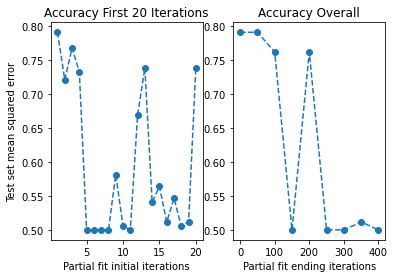

In [23]:
# Accuracy
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(range(1,21),np.abs(acc[:20]),'o--')
plt.xlabel('Partial fit initial iterations')
plt.ylabel('Test set mean squared error')
plt.title("Accuracy First 20 Iterations")
plt.subplot(1,2,2)
plt.plot(range(0,len(acc),50),np.abs(acc[0:len(acc):50]),'o--')
plt.xlabel('Partial fit ending iterations')
plt.title("Accuracy Overall")
plt.show()

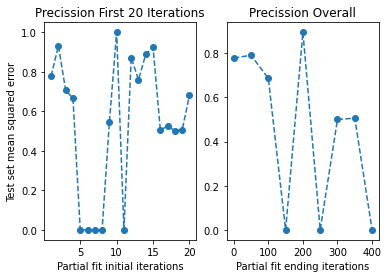

In [24]:
# Precision
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(range(1,21),np.abs(precision[:20]),'o--')
plt.xlabel('Partial fit initial iterations')
plt.ylabel('Test set mean squared error')
plt.title("Precission First 20 Iterations")
plt.subplot(1,2,2)
plt.plot(range(0,len(precision),50),np.abs(precision[0:len(precision):50]),'o--')
plt.xlabel('Partial fit ending iterations')
plt.title("Precission Overall")
plt.show()

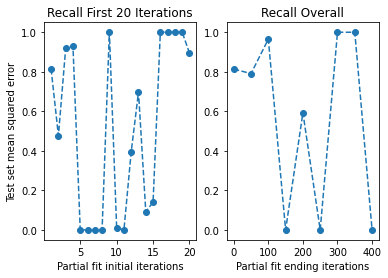

In [25]:
# Recall
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(range(1,21),np.abs(recall[:20]),'o--')
plt.xlabel('Partial fit initial iterations')
plt.ylabel('Test set mean squared error')
plt.title("Recall First 20 Iterations")
plt.subplot(1,2,2)
plt.plot(range(0,len(recall),50),np.abs(recall[0:len(recall):50]),'o--')
plt.xlabel('Partial fit ending iterations')
plt.title("Recall Overall")
plt.show()

## Conclusion

We see that that we were able to improve our original performance. But the best model is somewhere in the middle of all iterations.

> #### Warning
> We need to be careful because new data doesn't always mean better model. We should always test a new version and replace the old one only if there is an improvement.